# Solutions 2 - Examples in Eigenvalue Decomposition

## Assignment 1

In [1]:
# Pkg.add("MatrixMarket")
using MatrixMarket

In [2]:
whos(MatrixMarket)

                  MatrixMarket     18 KB     Module
                        mmread      0 bytes  MatrixMarket.#mmread
                       mmwrite      0 bytes  MatrixMarket.#mmwrite


In [3]:
#############################################################
# Download and parse every file from the NIST Matrix Market #
#############################################################

#Convenience function to emulate the behavior of gunzip
using GZip
function gunzip(fname)
    destname, ext = splitext(fname)
    if ext != ".gz"
        error("gunzip: $fname: unknown suffix -- ignored")
    end
    open(destname, "w") do f
        GZip.open(fname) do g
            write(f, string(g))
        end
    end
    destname
end

#Download and parse master list of matrices
if !isfile("matrices.html")
    download("http://math.nist.gov/MatrixMarket/matrices.html", "matrices.html")
end

matrixmarketdata = Any[]
open("matrices.html") do f
   for line in readlines(f)
       if contains(line, """<A HREF="/MatrixMarket/data/""")
           collectionname, setname, matrixname = split(split(line, '"')[2], '/')[4:6]
           matrixname = split(matrixname, '.')[1]
           push!(matrixmarketdata, (collectionname, setname, matrixname) )
       end
   end
end

#Download one matrix at random
n = rand(1:length(matrixmarketdata))
for (collectionname, setname, matrixname) in matrixmarketdata[n:n]
    fn = string(collectionname, '_', setname, '_', matrixname)
    mtxfname = string(fn, ".mtx")
    if !isfile(mtxfname)
        url = "ftp://math.nist.gov/pub/MatrixMarket2/$collectionname/$setname/$matrixname.mtx.gz"
        gzfname = string(fn, ".mtx.gz")
        try
            download(url, gzfname)
        catch
            continue
        end
        gunzip(gzfname)
    end
end

In [4]:
readdir()

31-element Array{String,1}:
 ".ipynb_checkpoints"                                                                     
 "Harwell-Boeing_bcspwr_bcspwr03.mtx"                                                     
 "Harwell-Boeing_bcspwr_bcspwr03.mtx.gz"                                                  
 "Harwell-Boeing_bcsstruc1_bcsstk11.mtx"                                                  
 "Harwell-Boeing_bcsstruc2_bcsstk15.mtx"                                                  
 "Harwell-Boeing_bcsstruc2_bcsstk15.mtx.gz"                                               
 "Harwell-Boeing_bcsstruc2_bcsstk17.mtx"                                                  
 "Harwell-Boeing_bcsstruc2_bcsstk17.mtx.gz"                                               
 "L3a Eigenvalue Decomposition - Definitions and Facts.ipynb"                             
 "L3b Eigenvalue Decomposition - Perturbation Theory.ipynb"                               
 "L4a Symmetric Eigenvalue Decomposition - Algorithms and Erro

In [5]:
A=mmread("Harwell-Boeing_bcsstruc1_bcsstk11.mtx")

1473×1473 SparseMatrixCSC{Float64,Int64} with 34241 stored entries:
  [1   ,    1]  =  1.01185e6
  [2   ,    1]  =  4.11009e6
  [3   ,    1]  =  -4.47035e-8
  [4   ,    1]  =  -3.11976e5
  [5   ,    1]  =  -1.18472e6
  [6   ,    1]  =  9.31323e-9
  [52  ,    1]  =  22135.0
  [53  ,    1]  =  90321.0
  [54  ,    1]  =  -18909.1
  [55  ,    1]  =  -1.4405e5
  ⋮
  [1415, 1473]  =  -1.36083e6
  [1416, 1473]  =  -2.28427e6
  [1420, 1473]  =  18909.1
  [1421, 1473]  =  4631.25
  [1422, 1473]  =  -5.29354e6
  [1465, 1473]  =  -1.02445e-8
  [1466, 1473]  =  3.35276e-8
  [1467, 1473]  =  7.58227e5
  [1471, 1473]  =  6.33299e-8
  [1472, 1473]  =  -2.6077e-7
  [1473, 1473]  =  1.82401e7

In [6]:
size(A)

(1473, 1473)

In [7]:
issymmetric(A)

true

In [8]:
cond(full(A))

2.2118529812227646e8

In [9]:
using Gadfly

In [10]:
?spy;

search: spy speye display Display displaysize displayable redisplay popdisplay



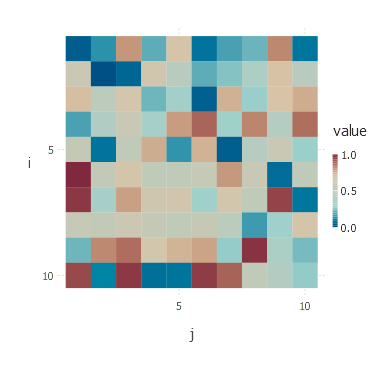

false

In [11]:
# Plot of a small random matrix, for illustration
B=rand(10,10)
myplot=spy(B)
draw(PNG(10cm,10cm),myplot)

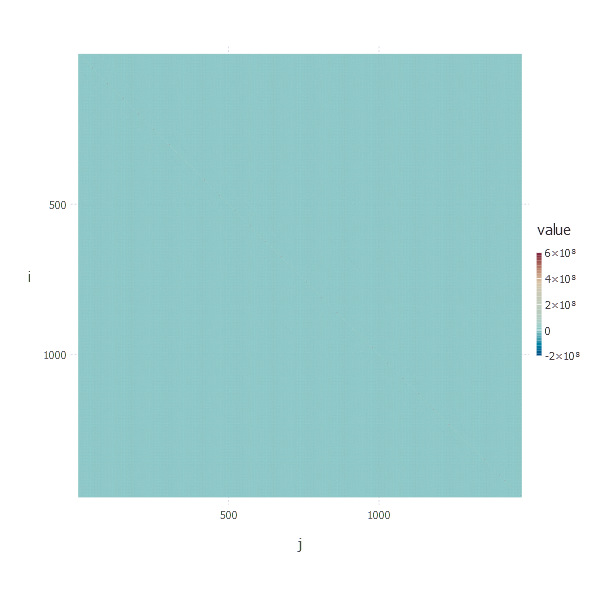

false

In [12]:
# Now our matrix - Wait!
myPlot=spy(A)
draw(PNG(16cm,16cm),myPlot)

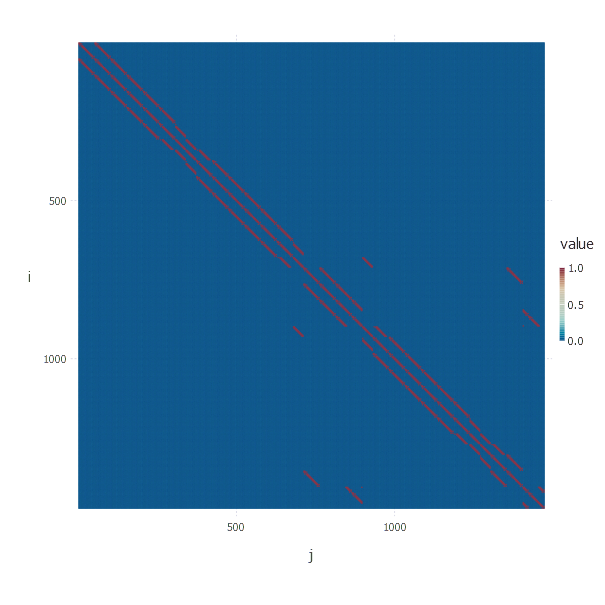

false

In [13]:
# To see the structure:
myPlot=spy(map(Int64,A.!=0.0))
draw(PNG(16cm,16cm),myPlot)

## Assignment 2

In [14]:
using MatrixDepot

In [15]:
whos(MatrixDepot)

                     @addgroup      0 bytes  MatrixDepot.#@addgroup
                      @rmgroup      0 bytes  MatrixDepot.#@rmgroup
                   MatrixDepot    336 KB     Module
                   matrixdepot      0 bytes  MatrixDepot.#matrixdepot


In [16]:
matrixdepot()


Matrices:
   1) baart            2) binomial         3) blur             4) cauchy        
   5) chebspec         6) chow             7) circul           8) clement       
   9) companion       10) deriv2          11) dingdong        12) erdrey        
  13) fiedler         14) forsythe        15) foxgood         16) frank         
  17) gilbert         18) golub           19) gravity         20) grcar         
  21) hadamard        22) hankel          23) heat            24) hilb          
  25) invhilb         26) invol           27) kahan           28) kms           
  29) lehmer          30) lotkin          31) magic           32) minij         
  33) moler           34) neumann         35) oscillate       36) parallax      
  37) parter          38) pascal          39) pei             40) phillips      
  41) poisson         42) prolate         43) randcorr        44) rando         
  45) randsvd         46) rohess          47) rosser          48) sampling      
  49) shaw       

In [17]:
matrixdepot("eigen")

23-element Array{String,1}:
 "chebspec" 
 "chow"     
 "circul"   
 "clement"  
 "dingdong" 
 "fiedler"  
 "forsythe" 
 "frank"    
 "grcar"    
 "hadamard" 
 "invol"    
 "lotkin"   
 "minij"    
 "neumann"  
 "oscillate"
 "parter"   
 "pascal"   
 "poisson"  
 "rosser"   
 "sampling" 
 "tridiag"  
 "wathen"   
 "wilkinson"

In [18]:
matrixdepot("sparse","symmetric")

2-element Array{String,1}:
 "poisson"
 "wathen" 

In [19]:
A=matrixdepot("fiedler",100)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] abs(::Array{Float64,2}) at .\deprecated.jl:57
 [3] fiedler(::Type{Float64}, ::Array{Int64,1}) at C:\Users\Ivan\.julia\v0.6\MatrixDepot\src\higham.jl:744
 [4] fiedler(::Int64) at C:\Users\Ivan\.julia\v0.6\MatrixDepot\src\higham.jl:747
 [5] matrixdepot(::String, ::Int64) at C:\Users\Ivan\.julia\v0.6\MatrixDepot\src\common.jl:162
 [6] include_string(::String, ::String) at .\loading.jl:522
 [7] include_string(::Module, ::String, ::String) at C:\Users\Ivan\.julia\v0.6\Compat\src\Compat.jl:71
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\Ivan\.julia\v0.6\IJulia\src\execute_request.jl:158
 [9] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at C:\Users\Ivan\.julia\v0.6\Compat\src\Compat.jl:385
 [10] eventloop(::ZMQ.Socket) at C:\Users\Ivan\.julia\v0.6\IJulia\src\eventloop.jl:8
 [11] (::IJulia.##14#17)() at .\task.jl:335
while loading In[19], in expression starting o

100×100 Array{Float64,2}:
  0.0   1.0   2.0   3.0   4.0   5.0  …  94.0  95.0  96.0  97.0  98.0  99.0
  1.0   0.0   1.0   2.0   3.0   4.0     93.0  94.0  95.0  96.0  97.0  98.0
  2.0   1.0   0.0   1.0   2.0   3.0     92.0  93.0  94.0  95.0  96.0  97.0
  3.0   2.0   1.0   0.0   1.0   2.0     91.0  92.0  93.0  94.0  95.0  96.0
  4.0   3.0   2.0   1.0   0.0   1.0     90.0  91.0  92.0  93.0  94.0  95.0
  5.0   4.0   3.0   2.0   1.0   0.0  …  89.0  90.0  91.0  92.0  93.0  94.0
  6.0   5.0   4.0   3.0   2.0   1.0     88.0  89.0  90.0  91.0  92.0  93.0
  7.0   6.0   5.0   4.0   3.0   2.0     87.0  88.0  89.0  90.0  91.0  92.0
  8.0   7.0   6.0   5.0   4.0   3.0     86.0  87.0  88.0  89.0  90.0  91.0
  9.0   8.0   7.0   6.0   5.0   4.0     85.0  86.0  87.0  88.0  89.0  90.0
 10.0   9.0   8.0   7.0   6.0   5.0  …  84.0  85.0  86.0  87.0  88.0  89.0
 11.0  10.0   9.0   8.0   7.0   6.0     83.0  84.0  85.0  86.0  87.0  88.0
 12.0  11.0  10.0   9.0   8.0   7.0     82.0  83.0  84.0  85.0  86.0  87.0

In [20]:
cond(A)

6945.654788928217

In [21]:
include("ModuleB.jl")

ModuleB

In [22]:
ModuleB.myPowerMethod(A,1e-10)

100-element Array{Float64,1}:
  3473.68    
 -2026.59    
  -638.615   
  -225.325   
  -133.599   
   -81.2238  
   -57.7518  
   -41.5227  
   -32.2345  
   -25.1849  
   -20.5961  
   -16.915   
   -14.319   
     ⋮       
    -0.518198
    -0.51523 
    -0.512545
    -0.510128
    -0.507981
    -0.506094
    -0.504469
    -0.503097
    -0.50198 
    -0.501112
    -0.500494
    -0.500123

In [23]:
eigvals(A)

100-element Array{Float64,1}:
 -2026.59    
  -638.615   
  -225.325   
  -133.599   
   -81.2238  
   -57.7518  
   -41.5227  
   -32.2345  
   -25.1849  
   -20.5961  
   -16.915   
   -14.319   
   -12.1587  
     ⋮       
    -0.51523 
    -0.512545
    -0.510128
    -0.507981
    -0.506094
    -0.504469
    -0.503097
    -0.50198 
    -0.501112
    -0.500494
    -0.500123
  3473.68    

In [24]:
matrixdepot("ill-cond","symmetric")

10-element Array{String,1}:
 "cauchy"   
 "hilb"     
 "invhilb"  
 "kms"      
 "moler"    
 "oscillate"
 "pascal"   
 "pei"      
 "prolate"  
 "tridiag"  

## Assignment 3


### Age of Search

google (and others)


* [50 billion pages](http://www.worldwidewebsize.com/), [3.5 billion querries daily](http://www.internetlivestats.com/google-search-statistics/)
* __PageRank__
* history, context - cookies, storing data (about you), [200+ parameters](http://backlinko.com/google-ranking-factors)
[Mol11]: https://www.mathworks.com/moler/exm/chapters/pagerank.pdf "C, Moler, 'Google PageRank', mathWorks, 2011."

### PageRank

* Graph theory and linear algebra
* [C. Moler, Google PageRank][Mol11]


[Mol11]: https://www.mathworks.com/moler/exm/chapters/pagerank.pdf "C, Moler, 'Google PageRank', mathWorks, 2011."

Some programs:

* https://github.com/purzelrakete/Pagerank.jl

* https://gist.github.com/domluna/2b9358ccc89fee7d5e26

You can also try function `eigs()` or the Power method.

We will try example from the Moler's paper.

In [25]:
i = vec([ 2 6 3 4 4 5 6 1 1])
j = vec([ 1 1 2 2 3 3 3 4 6])

9-element Array{Int64,1}:
 1
 1
 2
 2
 3
 3
 3
 4
 6

In [26]:
G=sparse(i,j,1.0)

6×6 SparseMatrixCSC{Float64,Int64} with 9 stored entries:
  [2, 1]  =  1.0
  [6, 1]  =  1.0
  [3, 2]  =  1.0
  [4, 2]  =  1.0
  [4, 3]  =  1.0
  [5, 3]  =  1.0
  [6, 3]  =  1.0
  [1, 4]  =  1.0
  [1, 6]  =  1.0

In [27]:
typeof(G)

SparseMatrixCSC{Float64,Int64}

In [28]:
full(G)

6×6 Array{Float64,2}:
 0.0  0.0  0.0  1.0  0.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0
 0.0  1.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0
 1.0  0.0  1.0  0.0  0.0  0.0

In [29]:
c=sum(G,1)
n=size(G,1)
for j=1:n
    if c[j]>0
        G[:,j]=G[:,j]/c[j]
    end
end

In [30]:
full(G)

6×6 Array{Float64,2}:
 0.0  0.0  0.0       1.0  0.0  1.0
 0.5  0.0  0.0       0.0  0.0  0.0
 0.0  0.5  0.0       0.0  0.0  0.0
 0.0  0.5  0.333333  0.0  0.0  0.0
 0.0  0.0  0.333333  0.0  0.0  0.0
 0.5  0.0  0.333333  0.0  0.0  0.0

* $p$ is the probability to a follow link
* $1-p$ is the probability to visit some random page
* google uses $p=0.85$ ?

In [31]:
p=0.85
δ=(1-p)/n

0.025000000000000005

In [32]:
z = ((1-p)*(c.!=0) + (c.==0))/n

1×6 Array{Float64,2}:
 0.025  0.025  0.025  0.025  0.166667  0.025

In [33]:
A=p*G+ones(n)*z

6×6 Array{Float64,2}:
 0.025  0.025  0.025     0.875  0.166667  0.875
 0.45   0.025  0.025     0.025  0.166667  0.025
 0.025  0.45   0.025     0.025  0.166667  0.025
 0.025  0.45   0.308333  0.025  0.166667  0.025
 0.025  0.025  0.308333  0.025  0.166667  0.025
 0.45   0.025  0.308333  0.025  0.166667  0.025

In [34]:
sum(A,1)

1×6 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0

###  The Idea

Let us start a random walk from the vector $x_0=\begin{bmatrix} 1/n \\ 1/n \\ \vdots \\ 1/n \end{bmatrix}$.

The subsequent vectors are  

$$
x_1=A\cdot x_0 \\
x_2=A\cdot x_1 \\
x_3=A\cdot x_2\\
\vdots
$$

When the vector __stabilizes__:

$$
A\cdot x\approx x,
$$

then $x[i]$ is the __rank of the page__ $i$.

In [35]:
function myPageRank(G::SparseMatrixCSC{Float64,Int64},steps::Int)
    p=0.85
    c=sum(G,1)/p
    n=size(G,1)
    for i=1:n
        G.nzval[G.colptr[i]:G.colptr[i+1]-1]./=c[i]
    end
    e=ones(n)
    x=e/n
    z = vec(((1-p)*(c.!=0) + (c.==0))/n)
    for j=1:steps
        x=G*x+(z⋅x)
    end
    x/norm(x,1)
end

myPageRank (generic function with 1 method)

In [36]:
fieldnames(G)

5-element Array{Symbol,1}:
 :m     
 :n     
 :colptr
 :rowval
 :nzval 

In [37]:
G

6×6 SparseMatrixCSC{Float64,Int64} with 9 stored entries:
  [2, 1]  =  0.5
  [6, 1]  =  0.5
  [3, 2]  =  0.5
  [4, 2]  =  0.5
  [4, 3]  =  0.333333
  [5, 3]  =  0.333333
  [6, 3]  =  0.333333
  [1, 4]  =  1.0
  [1, 6]  =  1.0

In [38]:
G.colptr

7-element Array{Int64,1}:
  1
  3
  5
  8
  9
  9
 10

In [39]:
G.nzval

9-element Array{Float64,1}:
 0.5     
 0.5     
 0.5     
 0.5     
 0.333333
 0.333333
 0.333333
 1.0     
 1.0     

In [40]:
# Starting vector
x=ones(n)/n

6-element Array{Float64,1}:
 0.166667
 0.166667
 0.166667
 0.166667
 0.166667
 0.166667

In [42]:
myPageRank(G,15)

6-element Array{Float64,1}:
 0.321024 
 0.170538 
 0.106596 
 0.136795 
 0.0643103
 0.200737 

### [Stanford web graph](http://snap.stanford.edu/data/web-Stanford.html)

This is somewhat larger test problem.

In [43]:
W=readdlm("web-Stanford.txt",Int)

2312497×2 Array{Int64,2}:
      1    6548
      1   15409
   6548   57031
  15409   13102
      2   17794
      2   25202
      2   53625
      2   54582
      2   64930
      2   73764
      2   84477
      2   98628
      2  100193
      ⋮        
 281849  165189
 281849  177014
 281849  226290
 281849  243180
 281849  244195
 281849  247252
 281849  281568
 281865  186750
 281865  225872
 281888  114388
 281888  192969
 281888  233184

In [44]:
?sparse;

search: sparse sparsevec SparseVector SparseArrays SparseMatrixCSC issparse



In [45]:
S=sparse(W[:,2],W[:,1],1.0)

281903×281903 SparseMatrixCSC{Float64,Int64} with 2312497 stored entries:
  [6548  ,      1]  =  1.0
  [15409 ,      1]  =  1.0
  [17794 ,      2]  =  1.0
  [25202 ,      2]  =  1.0
  [53625 ,      2]  =  1.0
  [54582 ,      2]  =  1.0
  [64930 ,      2]  =  1.0
  [73764 ,      2]  =  1.0
  [84477 ,      2]  =  1.0
  [98628 ,      2]  =  1.0
  ⋮
  [168703, 281902]  =  1.0
  [180771, 281902]  =  1.0
  [266504, 281902]  =  1.0
  [275189, 281902]  =  1.0
  [44103 , 281903]  =  1.0
  [56088 , 281903]  =  1.0
  [90591 , 281903]  =  1.0
  [94440 , 281903]  =  1.0
  [216688, 281903]  =  1.0
  [256539, 281903]  =  1.0
  [260899, 281903]  =  1.0

In [46]:
@time x100=myPageRank(S,100);

  1.631667 seconds (282.42 k allocations: 488.428 MiB, 5.56% gc time)


In [47]:
x101=myPageRank(S,101);

In [48]:
maximum(abs,(x101-x100)./x101)

2.349137550725276e-7

In [49]:
# Ranks
sort(x100,rev=true)

281903-element Array{Float64,1}:
 0.0113029 
 0.00926783
 0.00829727
 0.00302312
 0.00300128
 0.00257173
 0.00245371
 0.00243079
 0.00239105
 0.00236401
 0.002301  
 0.00226742
 0.00223245
 ⋮         
 5.33369e-7
 5.33369e-7
 5.33369e-7
 5.33369e-7
 5.33369e-7
 5.33369e-7
 5.33369e-7
 5.33369e-7
 5.33369e-7
 5.33369e-7
 5.33369e-7
 5.33369e-7

In [50]:
# Pages
sortperm(x100,rev=true)

281903-element Array{Int64,1}:
  89073
 226411
 241454
 262860
 134832
 234704
 136821
  68889
 105607
  69358
  67756
 225872
 186750
      ⋮
 281627
 281646
 281647
 281700
 281715
 281728
 281778
 281785
 281813
 281849
 281865
 281888